# MACHINE LEARNING MODEL

## Description Of The Data

# The Adult Income dataset
Description
Title of dataset: adult.csv

Sources:

* Original owners of database - US Census Bureau
* Donor of database - Ronny Kohavi and Barry Becker
* Date received - 05/19/96 
Number of Instances

* 48842 instances, mix of continuous and discrete (train=32561, test=16281)
* 45222 if instances with unknown values are removed (train=30162, test=15060)
* Split into train-test using MLC++ GenCVFiles (2/3, 1/3 random).
Number of Attributes/Fearures/Columns

* 6 continuous, 8 nominal attributes. 
Attribute Information/Fearures/Columns

* age: continuous.
* workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
* fnlwgt: continuous.
* education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
* education-num: continuous.
* marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
* occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
* relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
* race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
* sex: Female, Male.
* capital-gain: continuous.
* capital-loss: continuous.
* hours-per-week: continuous.
* native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
* income: >50K, <=50K 
Missing Values:

 7% rows have missing values. 

In [1]:
# Importing the required libraries :

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# loading the dataset

df = pd.read_csv('data/adult.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [3]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [4]:
df.tail()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
48841,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [5]:
# number ofcolumns and rows in the dataframe

print(df.shape)
print(" number of Rows : " +str(df.shape[0]))
print(" number of Columns : " +str(df.shape[1]))

(48842, 15)
 number of Rows : 48842
 number of Columns : 15


In [6]:
# Statistic analysis of data

df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


# Handling Missing Values

In [7]:
# identifying the missing values from the adult data set and replacing them from ( ' - ' , ' ? ' ) to NAN.

missing_values =['-','?']
df = pd.read_csv('data/adult.csv', na_values = missing_values)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        46043 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       46033 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   47985 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [8]:
#Removing all the rows containing the missing values
df.isnull().sum()
df.isnull().any(axis=1)
new_df=df.dropna()
new_df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


#  Data Preparation

In [9]:
#Removing the unnecessary column 'fnlwgt' from the dataset. 

new_df.drop(['fnlwgt'], axis=1 ,inplace = True)
new_df.head()

E:\anaconda\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,age,workclass,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


## Standardizing numerical data

In [10]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45222 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              45222 non-null  int64 
 1   workclass        45222 non-null  object
 2   education        45222 non-null  object
 3   educational-num  45222 non-null  int64 
 4   marital-status   45222 non-null  object
 5   occupation       45222 non-null  object
 6   relationship     45222 non-null  object
 7   race             45222 non-null  object
 8   gender           45222 non-null  object
 9   capital-gain     45222 non-null  int64 
 10  capital-loss     45222 non-null  int64 
 11  hours-per-week   45222 non-null  int64 
 12  native-country   45222 non-null  object
 13  income           45222 non-null  object
dtypes: int64(5), object(9)
memory usage: 5.2+ MB


In [11]:
numerical = new_df.select_dtypes(include=['int64', 'float64'])
numerical.head()

,age,educational-num,capital-gain,capital-loss,hours-per-week
0,25,7,0,0,40
1,38,9,0,0,50
2,28,12,0,0,40
3,44,10,7688,0,40
5,34,6,0,0,30


In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
new_df_num = pd.DataFrame(scaler.fit_transform(numerical), 
                      columns = numerical.columns)

new_df_num.head()

,age,educational-num,capital-gain,capital-loss,hours-per-week
0,-1.024983,-1.221559,-0.146733,-0.21878,-0.078120
1,-0.041455,-0.438122,-0.146733,-0.21878,0.754701
2,-0.798015,0.737034,-0.146733,-0.21878,-0.078120
3,0.412481,-0.046403,0.877467,-0.21878,-0.078120
4,-0.344079,-1.613277,-0.146733,-0.21878,-0.910942


## Encoding categorical features

In [13]:
categorical = new_df.select_dtypes(include=['object'])
categorical.head()

,workclass,education,marital-status,occupation,relationship,race,gender,native-country,income
0,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,United-States,<=50K
1,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,United-States,<=50K
2,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,United-States,>50K
3,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,United-States,>50K
5,Private,10th,Never-married,Other-service,Not-in-family,White,Male,United-States,<=50K


In [14]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first', sparse=False)
new_df_cat = pd.DataFrame(encoder.fit_transform(categorical), 
                      columns=encoder.get_feature_names(categorical.columns))

new_df_cat.head()

,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_11th,education_12th,education_1st-4th,education_5th-6th,...,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,income_>50K
0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [15]:
df = pd.concat([new_df_num, new_df_cat], axis=1)
df.head()

,age,educational-num,capital-gain,capital-loss,hours-per-week,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,...,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,income_>50K
0,-1.024983,-1.221559,-0.146733,-0.21878,-0.078120,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,-0.041455,-0.438122,-0.146733,-0.21878,0.754701,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,-0.798015,0.737034,-0.146733,-0.21878,-0.078120,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.412481,-0.046403,0.877467,-0.21878,-0.078120,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,-0.344079,-1.613277,-0.146733,-0.21878,-0.910942,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


## Test Train Split

In [16]:
y = df.pop('income_>50K')
X = df

In [17]:
# split into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=100)

In [18]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(31655, 95) (31655,)
(13567, 95) (13567,)


## Logistic Regression 

In [19]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train,y_train)

E:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [20]:
# print coefficients and intercept
print(classifier.coef_)
print(classifier.intercept_)

[[ 3.08492010e-01  7.48158298e-01  2.43135171e+00  2.72495802e-01
   3.53472870e-01 -5.55457711e-01 -3.79279435e-01 -2.30828065e-01
  -8.84503572e-01 -6.75596212e-01 -7.10312113e-01 -1.88684162e-01
  -4.73421047e-02  6.17775375e-01  6.53297237e-01  1.44980727e-01
   1.32919098e-01 -3.61950613e-01 -1.49951638e-01 -6.70654829e-02
  -2.16329215e-06 -2.62787038e-02 -7.89550126e-02 -3.71140115e-01
   1.62947551e-01  3.73020851e-02  2.05313679e+00  2.01894693e+00
  -1.65849050e-02 -4.55431529e-01 -1.09152338e-01  8.54479204e-02
   1.60355036e-01  3.79089271e-02  7.53105675e-01 -9.28546606e-01
  -6.40489137e-01 -3.15809558e-01 -8.72911317e-01 -1.45772829e+00
   4.94652661e-01  4.79668006e-01  2.72811071e-01  5.58983552e-01
  -3.33993252e-02  2.27172058e-01 -6.27762326e-01 -9.33959228e-01
   1.23885105e-02  1.04194919e+00  9.36666985e-01  2.48367591e-01
   2.51096542e-01  5.29905329e-01  6.30465210e-01  6.91003597e-01
  -7.31141514e-01 -1.61589229e+00  2.90539213e-01 -8.13005605e-01
   4.47573

# Prediction

In [21]:
# Predicting the model
y_pred = classifier.predict(X_test)
pred_prod = classifier.predict_proba(X_test)
np.around(pred_prod,decimals = 2)

array([[0.91, 0.09],
       [0.66, 0.34],
       [0.73, 0.27],
       ...,
       [0.36, 0.64],
       [0.21, 0.79],
       [0.44, 0.56]])

# Evaluation

In [22]:
# accuracy 
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred)

0.8495614358369573

In [23]:
# confusion matric
confusion_metrics = metrics.confusion_matrix(y_test,y_pred)
confusion_metrics

array([[9505,  706],
       [1335, 2021]], dtype=int64)

# Classification Report

In [24]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.88      0.93      0.90     10211
         1.0       0.74      0.60      0.66      3356

    accuracy                           0.85     13567
   macro avg       0.81      0.77      0.78     13567
weighted avg       0.84      0.85      0.84     13567



# Using RFE to extract the best features and building the model

In [25]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=250)

In [26]:
rfe = RFE(model, 32)
rfe = rfe.fit(X_train,y_train)
rfe

RFE(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                 fit_intercept=True, intercept_scaling=1,
                                 l1_ratio=None, max_iter=250,
                                 multi_class='auto', n_jobs=None, penalty='l2',
                                 random_state=None, solver='lbfgs', tol=0.0001,
                                 verbose=0, warm_start=False),
    n_features_to_select=32, step=1, verbose=0)

In [27]:
temp_df = pd.DataFrame({'Columns' : X_train.columns, 'Included' : rfe.support_, 'Ranking' : rfe.ranking_})
temp_df

,Columns,Included,Ranking
0,age,False,13
1,educational-num,True,1
2,capital-gain,True,1
3,capital-loss,False,21
4,hours-per-week,False,11
...,...,...,...
90,native-country_Thailand,False,7
91,native-country_Trinadad&Tobago,True,1
92,native-country_United-States,False,25
93,native-country_Vietnam,True,1


In [28]:
# list of all the Important columns
Imp_col = X_train.columns[rfe.support_]
Imp_col

Index(['educational-num', 'capital-gain', 'education_1st-4th',
       'education_5th-6th', 'marital-status_Married-AF-spouse',
       'marital-status_Married-civ-spouse', 'marital-status_Never-married',
       'occupation_Exec-managerial', 'occupation_Farming-fishing',
       'occupation_Handlers-cleaners', 'occupation_Machine-op-inspct',
       'occupation_Other-service', 'occupation_Priv-house-serv',
       'relationship_Other-relative', 'relationship_Own-child',
       'relationship_Wife', 'gender_Male', 'native-country_Canada',
       'native-country_China', 'native-country_Columbia',
       'native-country_Dominican-Republic', 'native-country_El-Salvador',
       'native-country_France', 'native-country_Guatemala',
       'native-country_Italy', 'native-country_Laos', 'native-country_Mexico',
       'native-country_Peru', 'native-country_Scotland',
       'native-country_South', 'native-country_Trinadad&Tobago',
       'native-country_Vietnam'],
      dtype='object')

In [29]:
X_train_new = X_train[Imp_col]
X_train_new

,educational-num,capital-gain,education_1st-4th,education_5th-6th,marital-status_Married-AF-spouse,marital-status_Married-civ-spouse,marital-status_Never-married,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,...,native-country_France,native-country_Guatemala,native-country_Italy,native-country_Laos,native-country_Mexico,native-country_Peru,native-country_Scotland,native-country_South,native-country_Trinadad&Tobago,native-country_Vietnam
25079,0.345316,-0.146733,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1039,-1.221559,-0.146733,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35954,-0.046403,-0.146733,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35748,-2.788433,-0.146733,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
38543,-0.046403,-0.146733,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16304,-1.613277,-0.146733,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
79,-0.046403,-0.146733,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12119,-0.438122,-0.146733,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14147,-0.046403,-0.146733,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
X_test_new = X_test[Imp_col]

X_test_new

,educational-num,capital-gain,education_1st-4th,education_5th-6th,marital-status_Married-AF-spouse,marital-status_Married-civ-spouse,marital-status_Never-married,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,...,native-country_France,native-country_Guatemala,native-country_Italy,native-country_Laos,native-country_Mexico,native-country_Peru,native-country_Scotland,native-country_South,native-country_Trinadad&Tobago,native-country_Vietnam
40273,-0.046403,-0.146733,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1984,-0.046403,-0.146733,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1230,-2.396715,0.266650,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25507,-2.396715,-0.146733,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
553,-0.046403,-0.146733,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19793,1.520471,-0.146733,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23298,1.128753,-0.146733,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2000,1.128753,-0.146733,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
39689,2.303909,-0.146733,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Training the Modal

In [31]:
from sklearn.linear_model import LogisticRegression
classifier_new_modal = LogisticRegression(max_iter=250)
classifier_new_modal.fit(X_train_new, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=250,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## Prediction

In [32]:
y_pred_new = classifier_new_modal.predict(X_test_new)
y_pred_new

array([0., 0., 0., ..., 1., 1., 1.])

## Evaluation

In [33]:
#Accuracy
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred_new)

0.8399056534237488

In [34]:
# confusion matric
confusion_metrics = metrics.confusion_matrix(y_test,y_pred_new)
confusion_metrics

array([[9496,  715],
       [1457, 1899]], dtype=int64)

## Classification Report

In [35]:
print(metrics.classification_report(y_test,y_pred_new))

              precision    recall  f1-score   support

         0.0       0.87      0.93      0.90     10211
         1.0       0.73      0.57      0.64      3356

    accuracy                           0.84     13567
   macro avg       0.80      0.75      0.77     13567
weighted avg       0.83      0.84      0.83     13567



# PCA(Principal Component Analysis)

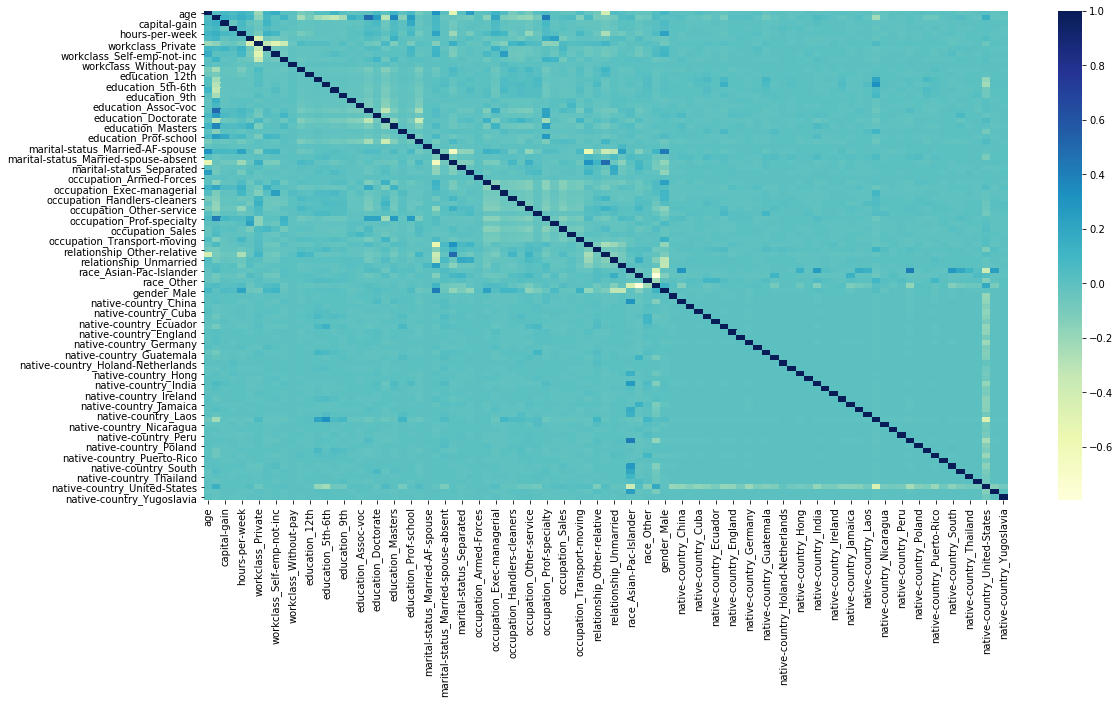

In [36]:
plt.figure(figsize=(18, 9))
sns.heatmap(X_train.corr(), cmap="YlGnBu")

In [37]:
X_train.shape

(31655, 95)

In [38]:
from sklearn.decomposition import PCA
pca = PCA(random_state = 0)

In [39]:
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=0,
    svd_solver='auto', tol=0.0, whiten=False)

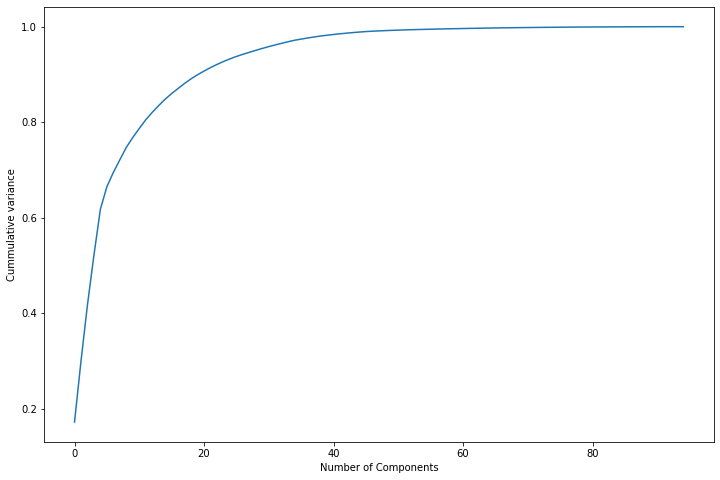

In [40]:
plt.figure(figsize = (12, 8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cummulative variance')
plt.show()

In [41]:
np.cumsum(pca.explained_variance_ratio_)

array([0.17209469, 0.29957921, 0.41750516, 0.52165317, 0.61795817,
       0.66488323, 0.69490688, 0.72127006, 0.74727138, 0.7680173 ,
       0.78682487, 0.80504524, 0.82060445, 0.83475912, 0.84824287,
       0.85995417, 0.87063823, 0.88122232, 0.89081766, 0.89939179,
       0.90702016, 0.91436822, 0.92093081, 0.92705973, 0.93253978,
       0.93764579, 0.94215837, 0.94636922, 0.95047   , 0.95445665,
       0.95830888, 0.9618176 , 0.96522477, 0.96857945, 0.97162644,
       0.97399569, 0.97630951, 0.97849607, 0.98042578, 0.98209484,
       0.9836655 , 0.98517006, 0.98641556, 0.98765236, 0.98877433,
       0.98979466, 0.99055719, 0.99120262, 0.99177869, 0.9923273 ,
       0.99281715, 0.99326858, 0.99367749, 0.99403505, 0.99438942,
       0.99472315, 0.99503357, 0.99534271, 0.99563967, 0.99590477,
       0.99616324, 0.99641807, 0.99666367, 0.99690372, 0.99713691,
       0.99735742, 0.99756245, 0.99774257, 0.99791853, 0.99808345,
       0.99823608, 0.99837884, 0.99851609, 0.9986477 , 0.99877

In [42]:
pca_final = PCA(n_components = 48,random_state = 0)

X_train_pca = pca_final.fit_transform(X_train)

X_train_pca

array([[ 7.44858632e-01,  5.85002737e-01, -1.64373281e-01, ...,
        -3.67538865e-02, -1.94884454e-03,  5.35401444e-02],
       [ 1.52103347e-01,  1.77203254e+00, -2.17234183e-01, ...,
         1.62837849e-03, -2.60774342e-02, -2.23514410e-03],
       [-1.19368348e+00, -9.16367525e-01, -8.85897644e-03, ...,
         1.20532878e-02, -2.32635203e-03,  7.36966903e-03],
       ...,
       [-5.23214112e-02,  1.48665407e+00, -1.78639795e-01, ...,
         1.31017278e-01, -1.02018375e-02,  7.51360640e-02],
       [ 7.38283806e-01,  7.32256799e-01, -1.92069737e-01, ...,
        -2.56840652e-02,  2.09167308e-03, -1.95652754e-04],
       [-3.90813354e-01, -1.39822412e-01, -9.61404993e-02, ...,
        -3.02091076e-02,  3.00282889e-03,  1.68371219e-03]])

In [43]:
X_train_pca.shape

(31655, 48)

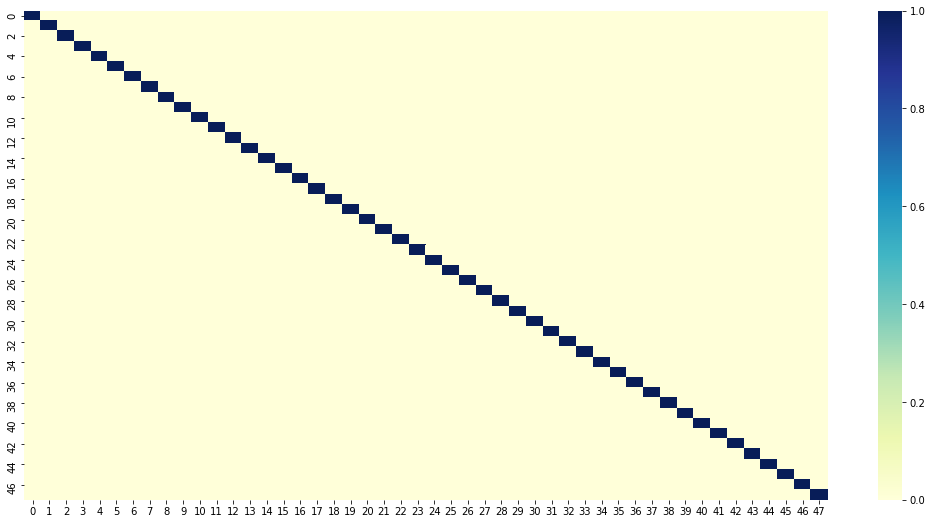

In [44]:
#heatmap of corrmat
corrmat = np.corrcoef(X_train_pca.T)

plt.figure(figsize=(18, 9))

sns.heatmap(corrmat, cmap="YlGnBu")

In [45]:
X_test_pca = pca_final.transform(X_test)

# Using LogisticRegression

In [46]:
from sklearn.linear_model import LogisticRegression

regressor_pca = LogisticRegression()

regressor_pca.fit(X_train_pca, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [47]:
# print coefficients and intercept

print(regressor_pca.coef_)

print(regressor_pca.intercept_)

[[ 2.29827975 -0.26316143 -1.05651992  0.76640757  1.3347713  -1.33971694
  -0.08685887 -0.45033556 -0.3208691  -0.24572816 -0.6986046  -0.85237784
   0.481661    0.24845131 -0.30952084 -0.19645075 -0.79739699 -0.40302121
   0.0420196   0.3677372  -0.89306924 -0.3266465  -0.17368928  0.17976362
  -0.38268009  0.49915769  0.00437712 -0.00615546  0.45137104  0.42045354
  -0.77576019 -0.10963687  0.88318706  0.42108889  0.51328652  0.70856394
   0.47140937  0.2069834   0.06465708 -0.26394039 -0.02380397  0.1707042
   0.32980388 -0.59454136  0.38381769  0.19223491 -0.15415312 -1.38958133]]
[-1.94252501]


## Prediction

In [48]:
# Prediction

y_test_pred_pca = regressor_pca.predict(X_test_pca)

temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred_pca})

temp_df.head()

,Actual,Predicted
40273,0.0,0.0
1984,1.0,0.0
1230,1.0,0.0
25507,0.0,0.0
553,0.0,1.0


## Errors in PCA model

In [49]:
# errors in PCA model
from sklearn import metrics
print('Mean Absolute Eerror:',metrics.mean_absolute_error(y_test,y_test_pred_pca))
print('Mean Squared Error:',metrics.mean_squared_error(y_test,y_test_pred_pca))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test,y_test_pred_pca)))

Mean Absolute Eerror: 0.15102823026461265
Mean Squared Error: 0.15102823026461265
Root Mean Squared Error: 0.38862350709216326


## Evaluation

In [50]:
#accuracy
from sklearn import metrics
metrics.accuracy_score(y_test, y_test_pred_pca)

0.8489717697353873

In [51]:
# confusion matric
confusion_metrics = metrics.confusion_matrix(y_test,y_test_pred_pca)
confusion_metrics

array([[9497,  714],
       [1335, 2021]], dtype=int64)

## Classification Report

In [52]:
print(metrics.classification_report(y_test,y_test_pred_pca))

              precision    recall  f1-score   support

         0.0       0.88      0.93      0.90     10211
         1.0       0.74      0.60      0.66      3356

    accuracy                           0.85     13567
   macro avg       0.81      0.77      0.78     13567
weighted avg       0.84      0.85      0.84     13567



# Using KNN 

In [53]:
from sklearn.neighbors import KNeighborsClassifier
classifier_knn = KNeighborsClassifier()
classifier_knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

## Prediction

In [54]:
#Prediction
y_pred_knn = classifier_knn.predict(X_test)
y_pred_knn

array([0., 1., 0., ..., 1., 1., 1.])

## Evaluation

In [55]:
#accuracy
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred_knn)

0.8329770767303014

In [56]:
# confusion matric
confusion_metrics = metrics.confusion_matrix(y_test,y_pred_knn)
confusion_metrics

array([[9237,  974],
       [1292, 2064]], dtype=int64)

## Classification Report

In [57]:
print(metrics.classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

         0.0       0.88      0.90      0.89     10211
         1.0       0.68      0.62      0.65      3356

    accuracy                           0.83     13567
   macro avg       0.78      0.76      0.77     13567
weighted avg       0.83      0.83      0.83     13567



# Using Decision Trees 

In [58]:
from sklearn import tree
decision_tree = tree.DecisionTreeClassifier(max_depth = 100)
decision_tree = decision_tree.fit(X_train_pca , y_train)

## Prediction

In [59]:
#Prediction
y_test_pred_dt = decision_tree.predict(X_test_pca)

## Evalution

In [60]:
#accuracy
from sklearn import metrics
metrics.accuracy_score(y_test, y_test_pred_dt)

0.8019458981351809

In [61]:
# confusion matric
confusion_metrics = metrics.confusion_matrix(y_test,y_test_pred_dt)
confusion_metrics

array([[8970, 1241],
       [1446, 1910]], dtype=int64)

## Classification Report

In [62]:
print(metrics.classification_report(y_test, y_test_pred_dt))

              precision    recall  f1-score   support

         0.0       0.86      0.88      0.87     10211
         1.0       0.61      0.57      0.59      3356

    accuracy                           0.80     13567
   macro avg       0.73      0.72      0.73     13567
weighted avg       0.80      0.80      0.80     13567



# Using SVM

In [63]:
from sklearn.svm import SVC
classifier_svm = SVC()
classifier_svm.fit(X_train_pca , y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

## Prediction

In [64]:
#prediction
y_test_pred_svm = classifier_svm.predict(X_test_pca)

## Evalution

In [65]:
#accuracy
from sklearn import metrics
metrics.accuracy_score(y_test, y_test_pred_svm)

0.8528783076582885

In [66]:
# confusion matric
confusion_metrics = metrics.confusion_matrix(y_test,y_test_pred_svm)
confusion_metrics

array([[9601,  610],
       [1386, 1970]], dtype=int64)

## Classification Report

In [67]:
print(metrics.classification_report(y_test, y_test_pred_svm))

              precision    recall  f1-score   support

         0.0       0.87      0.94      0.91     10211
         1.0       0.76      0.59      0.66      3356

    accuracy                           0.85     13567
   macro avg       0.82      0.76      0.78     13567
weighted avg       0.85      0.85      0.85     13567

